In [2]:
import numpy as np
from numpy.linalg import solve
import matplotlib.pyplot as plt
from scipy.linalg import qr
from scipy import optimize
from scipy.special import erfinv
from scipy.optimize import minimize_scalar
import egrss 
import time
import lambda_fun 
import os

sigma = 0.1
a,b   = -0.2, 0.5

def y(x):
    return 0.25*np.cos(4*np.pi *x) + 0.15*np.sin(12* np.pi *x) + 0.2 * x

In [1]:
# finding runtimes for varying degrees
degree_range = range(1,6)
GML_deg = np.zeros([10,5])
N = 100
for i in range(10):
    for j in range(5):
        x = np.linspace(a,b, N)
        yhat = y(x) + sigma * np.random.normal(loc = 0, scale = 1, size = N)
        start_time = time.time()
        res_GML = lambda_fun.min_GML(N = 100, x = x, p = degree_range[j], yhat = yhat, method = 'bounded', usage = 'min', bounds = (1,12))
        GML_deg[i, j] = (time.time() - start_time)
        print("model: GML, N: %d, degree: %d, time: %s seconds" % (N, degree_range[j], time.time() - start_time))

GCV_deg = np.zeros([10,5])
for i in range(10):
    for j in range(5):
        x = np.linspace(a,b, N)
        yhat = y(x) + sigma * np.random.normal(loc = 0, scale = 1, size = N)
        start_time = time.time()
        res_GCV = lambda_fun.min_GCV(N = 100, x = x , p = degree_range[j], yhat = yhat, method = 'bounded', usage = 'min', bounds = (1,12))
        GCV_deg[i, j] = (time.time() - start_time)
        print("model: GCV, N: %d, degree: %d, time: %s seconds" % (N, degree_range[j], time.time() - start_time))

        

model: GML, N: 100, degree: 1, time: 0.046155691146850586 seconds
model: GML, N: 100, degree: 2, time: 0.05120086669921875 seconds
model: GML, N: 100, degree: 3, time: 0.07394909858703613 seconds
model: GML, N: 100, degree: 4, time: 0.11132311820983887 seconds
model: GML, N: 100, degree: 5, time: 0.21291804313659668 seconds
model: GML, N: 100, degree: 1, time: 0.04641318321228027 seconds
model: GML, N: 100, degree: 2, time: 0.051988840103149414 seconds
model: GML, N: 100, degree: 3, time: 0.0653839111328125 seconds
model: GML, N: 100, degree: 4, time: 0.08789515495300293 seconds
model: GML, N: 100, degree: 5, time: 0.1897721290588379 seconds
model: GML, N: 100, degree: 1, time: 0.04173016548156738 seconds
model: GML, N: 100, degree: 2, time: 0.046015024185180664 seconds
model: GML, N: 100, degree: 3, time: 0.05282402038574219 seconds
model: GML, N: 100, degree: 4, time: 0.17632603645324707 seconds
model: GML, N: 100, degree: 5, time: 0.2312157154083252 seconds
model: GML, N: 100, degre

KeyboardInterrupt: 

In [7]:
p = 2

In [32]:
# finding runtimes for varying numbers of observations
numpoints = np.linspace(2, 2000, 10, dtype = int)
GML_N = np.zeros([len(numpoints),10])
p = 2
for i in range(len(numpoints)):
    for j in range(10):
        N = numpoints[j]
        x = np.linspace(a,b, N)
        yhat = y(x) + sigma * np.random.normal(loc = 0, scale = 1, size = N)
        start_time = time.time()
        res_GML = lambda_fun.min_GML(N = numpoints[j], x = x, p = 2, yhat = yhat, method = 'bounded', usage = 'min', bounds = (1,12))
        GML_N[i, j] = (time.time() - start_time)
        print("model: GML, N: %d, degree: %d, time: %s seconds" % (numpoints[j], p, time.time() - start_time))

/Users/frida/OneDrive - Danmarks Tekniske Universitet/Bachelor/Bachelor/lambda_fun.py:42: RuntimeWarning: divide by zero encountered in log
  return np.asscalar(np.log(np.transpose(yhat) @ alpha) + 2/(N-p)* np.sum(np.log(z)) + 2/(N-p) *np.log(abs(np.linalg.det(R))))
/Users/frida/OneDrive - Danmarks Tekniske Universitet/Bachelor/Bachelor/lambda_fun.py:42: RuntimeWarning: divide by zero encountered in long_scalars
  return np.asscalar(np.log(np.transpose(yhat) @ alpha) + 2/(N-p)* np.sum(np.log(z)) + 2/(N-p) *np.log(abs(np.linalg.det(R))))
/Users/frida/OneDrive - Danmarks Tekniske Universitet/Bachelor/Bachelor/lambda_fun.py:42: RuntimeWarning: invalid value encountered in double_scalars
  return np.asscalar(np.log(np.transpose(yhat) @ alpha) + 2/(N-p)* np.sum(np.log(z)) + 2/(N-p) *np.log(abs(np.linalg.det(R))))


model: GML, N: 2, degree: 2, time: 0.02182292938232422 seconds
model: GML, N: 224, degree: 2, time: 0.10318732261657715 seconds
model: GML, N: 446, degree: 2, time: 0.22173118591308594 seconds
model: GML, N: 668, degree: 2, time: 0.27527499198913574 seconds
model: GML, N: 890, degree: 2, time: 0.3642160892486572 seconds
model: GML, N: 1112, degree: 2, time: 0.4519021511077881 seconds
model: GML, N: 1334, degree: 2, time: 0.5366930961608887 seconds
model: GML, N: 1556, degree: 2, time: 0.6803009510040283 seconds
model: GML, N: 1778, degree: 2, time: 0.7459311485290527 seconds
model: GML, N: 2000, degree: 2, time: 0.9768290519714355 seconds
model: GML, N: 2, degree: 2, time: 0.01306009292602539 seconds
model: GML, N: 224, degree: 2, time: 0.09216499328613281 seconds
model: GML, N: 446, degree: 2, time: 0.20230412483215332 seconds
model: GML, N: 668, degree: 2, time: 0.3183732032775879 seconds
model: GML, N: 890, degree: 2, time: 0.427321195602417 seconds
model: GML, N: 1112, degree: 2, t

In [ ]:
GCV_N = np.zeros([8, 10])
numpointslog = np.logspace(2,4,8, dtype = int)
for i in range(len(numpointslog)):
    for j in range(10):
        N = numpointslog[j]
        x = np.linspace(a,b, N)
        yhat = y(x) + sigma * np.random.normal(loc = 0, scale = 1, size = N)
        start_time = time.time()
        res_GCV = lambda_fun.min_GCV(N = numpointslog[j], x = x, p = 2, yhat = yhat, method = 'bounded', usage = 'min', bounds = (1,12))
        GCV_N[i, j] = (time.time() - start_time)
        print("model: GCV, N: %d, degree: %d, time: %s seconds" % (numpointslog[j], p , time.time() - start_time))
# %%

model: GCV, N: 100, degree: 2, time: 0.3451871871948242 seconds
model: GCV, N: 193, degree: 2, time: 1.1771981716156006 seconds
model: GCV, N: 372, degree: 2, time: 4.436934947967529 seconds
model: GCV, N: 719, degree: 2, time: 12.401474952697754 seconds
model: GCV, N: 1389, degree: 2, time: 56.32640290260315 seconds
model: GCV, N: 2682, degree: 2, time: 201.9739100933075 seconds
model: GCV, N: 5179, degree: 2, time: 762.5447769165039 seconds


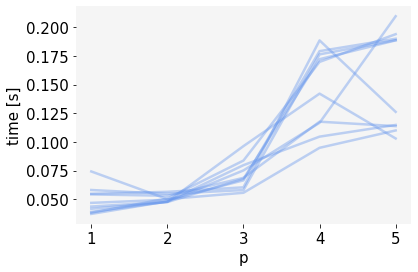

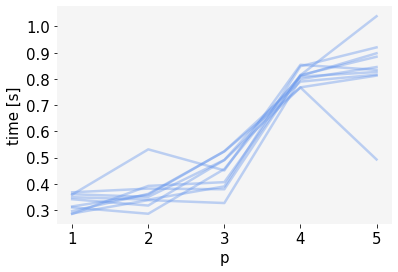

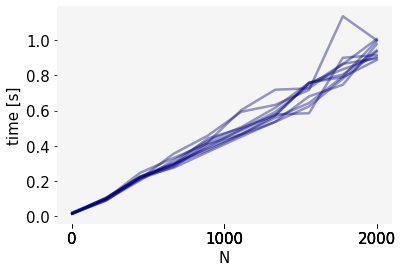

In [33]:
def plot(x,y, col, xlabel, ylabel, savename, rounding):
    fig = plt.figure()
    for i in range(10):
        plt.plot(x,y[i, :], color = col, linewidth = 2.5, alpha = 0.4)
    ax = plt.gca()
    ax.set_facecolor('whitesmoke')
    plt.xlabel(xlabel, fontsize = 15)
    plt.ylabel(ylabel, fontsize = 15)
    plt.xticks(np.around(x, decimals = rounding), fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.tick_params(left=True, bottom = True, right = False, top = False)
    ax = plt.gca()
    ax.set_facecolor('whitesmoke')
    for spine in plt.gca().spines.values():
        spine.set_visible(False)
    plt.show
    my_path = os.getcwd()
    fig.savefig(my_path + savename, bbox_inches='tight')


plot(degree_range, GML_deg, 'cornflowerblue' ,xlabel = 's', ylabel = 'time [s]',savename = "/Plots/GML_deg.pdf", rounding = 0)

plot(degree_range, GCV_deg,'cornflowerblue', xlabel = 's', ylabel = 'time [s]', savename = "/Plots/GCV_deg.pdf", rounding = 0)

plot(numpoints, GML_N, 'navy', xlabel = 'N', ylabel = 'time [s]', savename = "/Plots/GML_N.pdf", rounding = -3)

In [ ]:
plot(np.log10(numpoints), np.log10(GCV_N), 'navy', xlabel = 'log(N)', ylabel = 'log(time) [s]', savename = "/Plots/GCV_N.pdf")